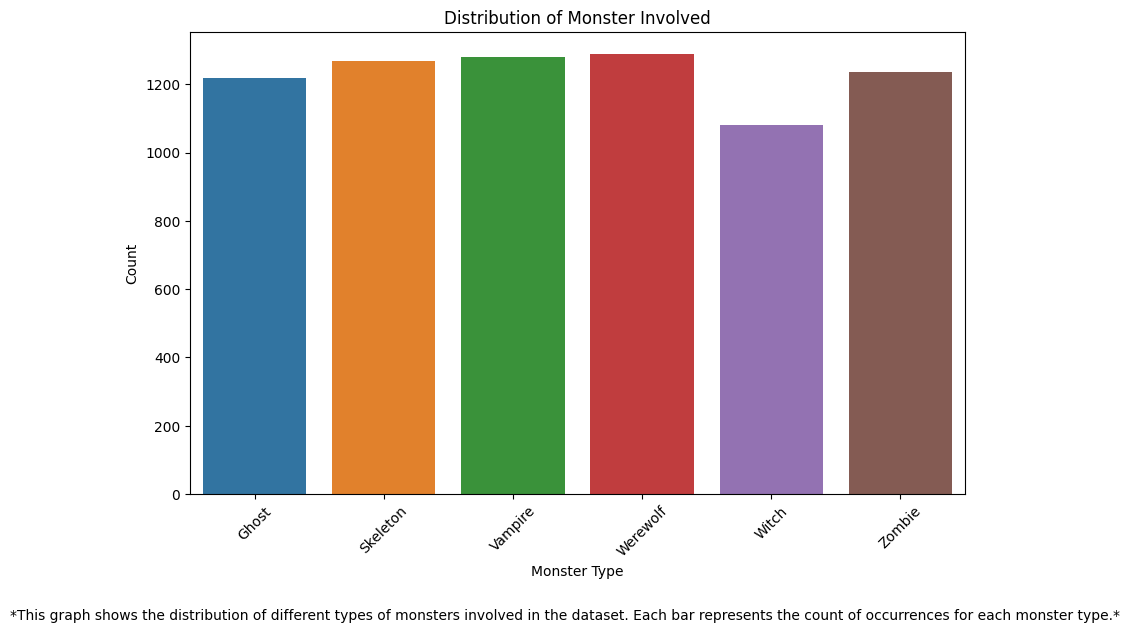

Epoch 1/50
185/185 [==============================] - 2s 8ms/step - loss: 31.8922 - accuracy: 0.2274 - val_loss: 1.7446 - val_accuracy: 0.2047
Epoch 2/50
185/185 [==============================] - 1s 6ms/step - loss: 2.0068 - accuracy: 0.2157 - val_loss: 1.7291 - val_accuracy: 0.2088
Epoch 3/50
185/185 [==============================] - 2s 13ms/step - loss: 1.8099 - accuracy: 0.2294 - val_loss: 1.7004 - val_accuracy: 0.2203
Epoch 4/50
185/185 [==============================] - 1s 7ms/step - loss: 1.7311 - accuracy: 0.2461 - val_loss: 1.6165 - val_accuracy: 0.2671
Epoch 5/50
185/185 [==============================] - 1s 7ms/step - loss: 1.6822 - accuracy: 0.2701 - val_loss: 1.5425 - val_accuracy: 0.3139
Epoch 6/50
185/185 [==============================] - 1s 7ms/step - loss: 1.6186 - accuracy: 0.2842 - val_loss: 1.5578 - val_accuracy: 0.2820
Epoch 7/50
185/185 [==============================] - 1s 7ms/step - loss: 1.5705 - accuracy: 0.3024 - val_loss: 1.5117 - val_accuracy: 0.3261
Epoc

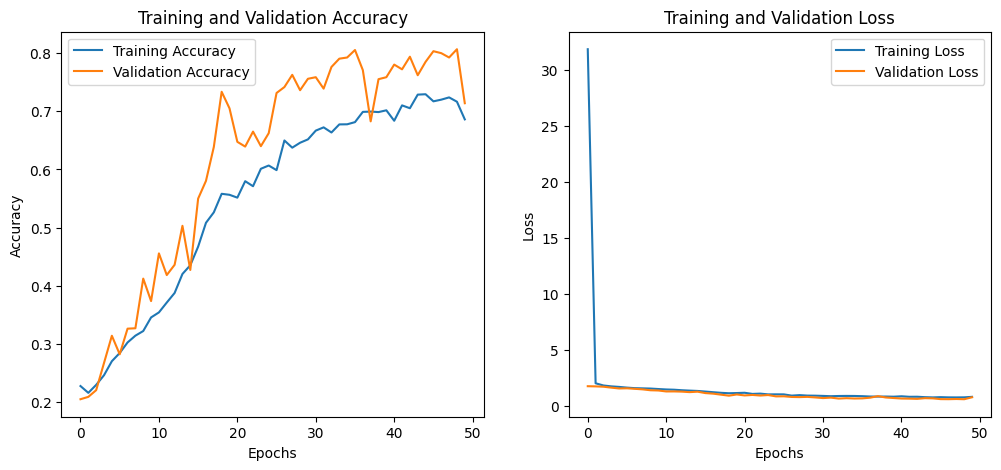

47/47 [==============================] - 0s 3ms/step - loss: 0.7555 - accuracy: 0.7139
Neural Network Accuracy: 0.7138983011245728
1/1 [==============================] - 0s 155ms/step


C:\Users\mschw\AppData\Local\Temp\ipykernel_20696\2441317014.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crimes['Predicted Monster'] = le_monster.inverse_transform(predicted_monsters_labels)


NameError: name '__file__' is not defined

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Load the dataset
crimes_df = pd.read_csv(r'merged_df.csv')

# Drop rows with missing values
crimes_df = crimes_df.dropna()

# Standardize monster names to have the first letter uppercase and the rest lowercase
crimes_df['Monster involved'] = crimes_df['Monster involved'].str.capitalize()

# Encode categorical variables for the target
le_monster = LabelEncoder()
crimes_df['Monster involved'] = le_monster.fit_transform(crimes_df['Monster involved'].astype(str))

# Use all available features except the target for input data
X = crimes_df.drop(columns=['Monster involved'])
y = crimes_df['Monster involved']

# Convert categorical features into numeric
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.xticks(ticks=np.arange(len(le_monster.classes_)), labels=le_monster.inverse_transform(np.arange(len(le_monster.classes_))), rotation=45)
plt.title('Distribution of Monster Involved')
plt.xlabel('Monster Type')
plt.ylabel('Count')
plt.figtext(0.5, -0.1, '*This graph shows the distribution of different types of monsters involved in the dataset. Each bar represents the count of occurrences for each monster type.*', ha='center', fontsize=10)
plt.show()

# Build a Neural Network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(le_monster.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and visualize training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
eval_results = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", eval_results[1])

# Filter the dataset for prediction
filtered_crimes = crimes_df[(crimes_df['Region'].str.lower() == 'village') &
                            (crimes_df['Time of Day'].str.lower() == 'day') &
                            (crimes_df['Evidence Found'].str.lower() == 'bones') &
                            (crimes_df['Crime Weapon'].str.lower() == 'knife')]

# Prepare filtered data for prediction
filtered_crimes_encoded = pd.get_dummies(filtered_crimes.drop(columns=['Monster involved']))
filtered_crimes_encoded = filtered_crimes_encoded.reindex(columns=X.columns, fill_value=0)
filtered_crimes_encoded = filtered_crimes_encoded.astype('float32')

# Predict the monster involved in filtered crimes
predicted_monsters_nn = model.predict(filtered_crimes_encoded)
predicted_monsters_labels = np.argmax(predicted_monsters_nn, axis=1)
filtered_crimes['Predicted Monster'] = le_monster.inverse_transform(predicted_monsters_labels)

# Setze das aktuelle Arbeitsverzeichnis auf das Verzeichnis des Skripts
os.chdir(os.path.dirname(__file__))

# Speichern der CSV im selben Ordner wie das Skript
filtered_crimes.to_csv('predicted_monsters_all_features.csv', index=False)